# Derivation of beam shape functions

In this notebook we aim to derive the cubic  functions that describe the shape of a Bernoulli-Euler beam. The python package `sympy` is used for the symbolic manipulations.

The deflection of the beam is here considered in axes $x-z$, where $x$ increases to the right, and $z$ increases downwards. The deflection $w(\xi)=N_1(\xi) W_1+(h/2)N_2(\xi) W_2+N_3(\xi) W_3+(h/2) N_4(\xi) W_4$ is positive downwards, along the $z$ axis.

In [1]:
from sympy import *
import matplotlib.pyplot as plt

Each of the four shape functions of a beam will be expressed in the parametric coordinate $\xi$, as a cubic function $N_k=a_k+b_k \xi+c_k \xi^2+d_k\xi^3$.

In [2]:
xi = symbols('xi')
a, b, c, d = symbols('a b c d')
N = a + b * xi + c * xi**2 + d * xi**3

The derivatives of these functions may be expressed as

In [3]:
dNdxi = diff(N, xi)
d2Ndxi2 = diff(N, xi, 2)
d3Ndxi3 = diff(N, xi, 3)
print(dNdxi)
print(d2Ndxi2)
print(d3Ndxi3)

b + 2*c*xi + 3*d*xi**2
2*(c + 3*d*xi)
6*d


The four coefficients for each of the four shape functions may be computed from four conditions: these conditions are the value and slope of the shape function at either end of the interval $-1\le \xi \le +1$. For instance, the first shape function, $N_1$, should have a value of +1 at $\xi=-1$. So the polynomial expression proposed above evaluated at  $\xi=-1$ reads

In [4]:
N.subs(xi, -1)

a - b + c - d

and should be equal to 1. Further, the slope at $\xi=-1$ and the value and the slope at $\xi=+1$ should all be zero.

In [5]:
dNdxi.subs(xi, -1)

b - 2*c + 3*d

In [6]:
N.subs(xi, +1)

a + b + c + d

In [7]:
dNdxi.subs(xi, +1)

b + 2*c + 3*d

Thus we have these four equations
$$
\begin{array}{l}
a-b+c-d=1 \\
b-2c+3d=0 \\
a+b+c+d=0 \\
b+2c+3d=0
\end{array}
$$
and we can solve them for the coefficients $a, b, c, d$.

This very same system of equations may be written as a matrix expression defining the coefficient matrix `C` and the vector of the unknown coefficient `abcd`.

In [8]:
C = Matrix([
    [1, -1, 1, -1],
    [0, 1, -2, 3],
    [1, 1, 1, 1],
    [0, 1, 2, 3]
])
abcd = Matrix([[a], [b], [c], [d]])

The equality above may then be written as

In [9]:
Eq(C * abcd, Matrix([[1], [0], [0], [0]]))

Eq(Matrix([
[a - b + c - d],
[b - 2*c + 3*d],
[a + b + c + d],
[b + 2*c + 3*d]]), Matrix([
[1],
[0],
[0],
[0]]))

and solved for the coefficients as

In [10]:
sol = solve(Eq(C * abcd, Matrix([[1], [0], [0], [0]])))
N1 = sum(coeff*xi**j for j, coeff in enumerate(sol.values()))
print(N1)

xi**3/4 - 3*xi/4 + 1/2


We see the first shape function follow
as $N_1 = (2 - 3\xi + \xi^3)/4$.

The second shape function should correspond to a positive unit rotation at $\xi=-1$, and therefore to a negative slope. 

In [11]:
Eq(C * abcd, Matrix([[0], [-1], [0], [0]]))

Eq(Matrix([
[a - b + c - d],
[b - 2*c + 3*d],
[a + b + c + d],
[b + 2*c + 3*d]]), Matrix([
[ 0],
[-1],
[ 0],
[ 0]]))

In [12]:
sol = solve(Eq(C * abcd, Matrix([[0], [-1], [0], [0]])))
N2 = sum(coeff*xi**j for j, coeff in enumerate(sol.values()))
print(N2)


-xi**3/4 + xi**2/4 + xi/4 - 1/4


The second shape function is therefore $N_2=(-1+\xi+\xi^2-\xi^3)/4$.

The third shape function should have a value of +1 at $\xi=+1$.

In [13]:
sol = solve(Eq(C * abcd, Matrix([[0], [0], [+1], [0]])))
N3 = sum(coeff*xi**j for j, coeff in enumerate(sol.values()))
print(N3)

-xi**3/4 + 3*xi/4 + 1/2


Which gives $N_3=(2+3\xi-\xi^3)/4$

Finally, the fourth shape function should represent rotation at $\xi=+1$ (and again, the slope is the negative of the rotation).

In [14]:
sol = solve(Eq(C * abcd, Matrix([[0], [0], [0], [-1]])))
N4 = sum(coeff*xi**j for j, coeff in enumerate(sol.values()))
print(N4)

-xi**3/4 - xi**2/4 + xi/4 + 1/4


The fourth shape function is therefore $N_4=(+1+\xi-\xi^2-\xi^3)/4$.

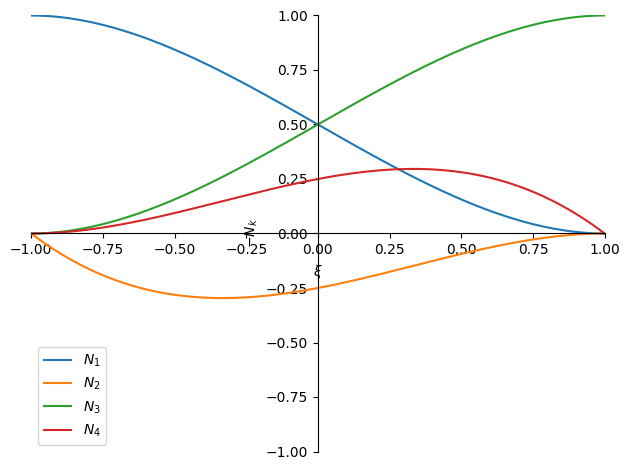

In [15]:
p = plot(xlim=(-1, 1), ylim=(-1, 1), xlabel='$\\xi$', ylabel='$-N_k$', legend=True, show=False)
p.extend(plot(N1, label='$N_1$', show=False))
p.extend(plot(N2, label='$N_2$', show=False))
p.extend(plot(N3, label='$N_3$', show=False))
p.extend(plot(N4, label='$N_4$', show=False))
p.show()
